# 주식과 채권으로 포트폴리오 구성

In [43]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')

sns.set()
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


## Data Load

In [44]:
dfs = pd.read_csv('../datasets/kodex_stock.csv')
dfs = dfs.set_index('dt')
dfs

,close,high,low,open,volume
dt,,,,,
2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0
...,...,...,...,...,...
2019-07-17,71210.0,71220.0,71070.0,71080.0,344.0
2019-07-18,71665.0,71665.0,71290.0,71290.0,1516.0
2019-07-19,71770.0,71850.0,71670.0,71670.0,15083.0


In [45]:
dfb = pd.read_csv('../datasets/kodex_bond10y.csv')
dfb = dfb.set_index('dt')
dfb

,close,high,low,open,volume
dt,,,,,
2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25
...,...,...,...,...,...
2019-07-17,27225.0,27340.0,27130.0,27310.0,1886297.00
2019-07-18,27165.0,27260.0,27065.0,27180.0,2290347.00
2019-07-19,27545.0,27610.0,27315.0,27315.0,2532920.00


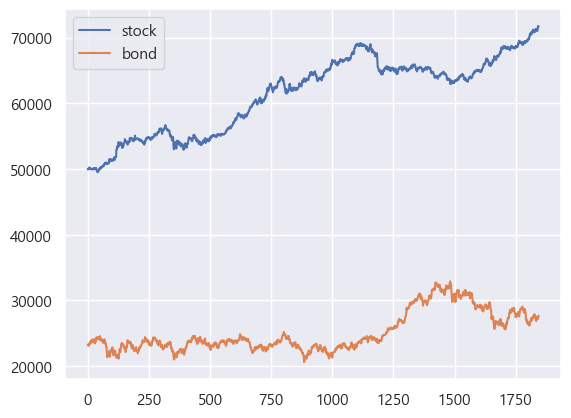

In [57]:
plt.figure()
plt.plot(dfs['close'].values, label='stock')
plt.plot(dfb['close'].values, label='bond')
plt.legend()
plt.show()

## 포트폴리오 구성

In [46]:
ret_dic = {'stock' :np.log(1+dfs['close'].pct_change()), 'bond':np.log(1+dfb['close'].pct_change())}
ret_df = pd.DataFrame(ret_dic)
ret_df.head()

,stock,bond
dt,,
2012-01-20,NaN,NaN
2012-01-25,0.000000,0.003443
2012-01-26,-0.000601,0.000953
2012-01-27,0.001401,0.001527
2012-01-30,0.002597,-0.011300


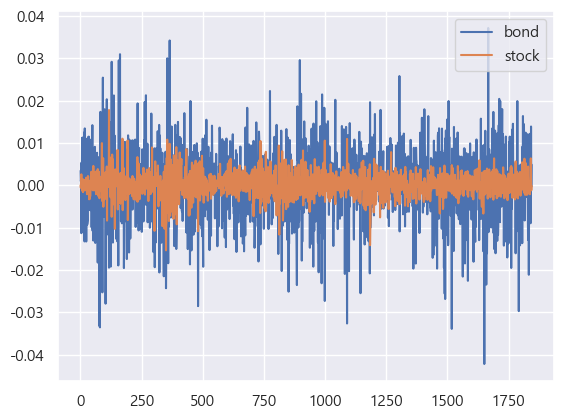

In [58]:
plt.figure()
plt.plot(ret_dic['bond'].values, label='bond')
plt.plot(ret_dic['stock'].values, label='stock')
plt.legend()
plt.show()

In [47]:
annual_ret = ret_df.mean() * 252
annual_cov = ret_df.cov() * 252

port_ret = [] 
port_risk = [] 
port_sharpe = [] 
port_weights = [] 

riskfree_rate =  0 #0.02

items = ['stock', 'bond']

for _ in range(20000): 
    weights = np.random.random(len(items))  # 종목 개수만큼 random한 숫자 뽑음 (양수)
    weights /= np.sum(weights)   # 이를 확률. 즉, 합이 1이 되게 비율화 함.

    returns = np.dot(weights, annual_ret)  # 종목별 연기대수익률에 weight를 곱해서 portfolio 기대수익률 계산
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))  # 연 Risk에 wCwT 해서 portfolio risk 계산
    
    sharpe = (returns-riskfree_rate)/risk 
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_sharpe.append(sharpe)
    port_weights.append(weights) # Weight, Return, Risk 저장

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe':port_sharpe} # Risk Return dic
for i, s in enumerate(items):  
    portfolio[s] = [weight[i] for weight in port_weights]  # Weight dic
df = pd.DataFrame(portfolio)   # DataFrame화
df

,Returns,Risk,Sharpe,stock,bond
0,0.028019,0.108330,0.258640,0.155549,0.844451
1,0.034179,0.077294,0.442197,0.399743,0.600257
2,0.031825,0.088856,0.358160,0.306413,0.693587
3,0.037185,0.063460,0.585960,0.518875,0.481125
4,0.029014,0.103168,0.281231,0.195002,0.804998
...,...,...,...,...,...
19995,0.045415,0.039908,1.137979,0.845091,0.154909
19996,0.042850,0.043544,0.984054,0.743416,0.256584
19997,0.043688,0.041851,1.043901,0.776658,0.223342
19998,0.037582,0.061741,0.608713,0.534635,0.465365


In [48]:
# Sharpe rate 최대
sharp_max_point = df[df['Sharpe']==df['Sharpe'].max()]
sharp_max = sharp_max_point['Sharpe'].values[0]

# 위험리스크 최소
risk_min_point = df[df['Risk']==df['Risk'].min()]
risk_min = risk_min_point['Risk'].values[0]

# 수익률 최대
return_max_point = df[df['Returns']==df['Returns'].max()]
return_max = return_max_point['Returns'].values[0]

print(f'Expected annual return: {return_max:.4f}')
print(f'Annual volatility: {risk_min:.4f}')
print(f'Sharpe Ratio: {sharp_max:.4f}')

Expected annual return: 0.0493
Annual volatility: 0.0398
Sharpe Ratio: 1.1710


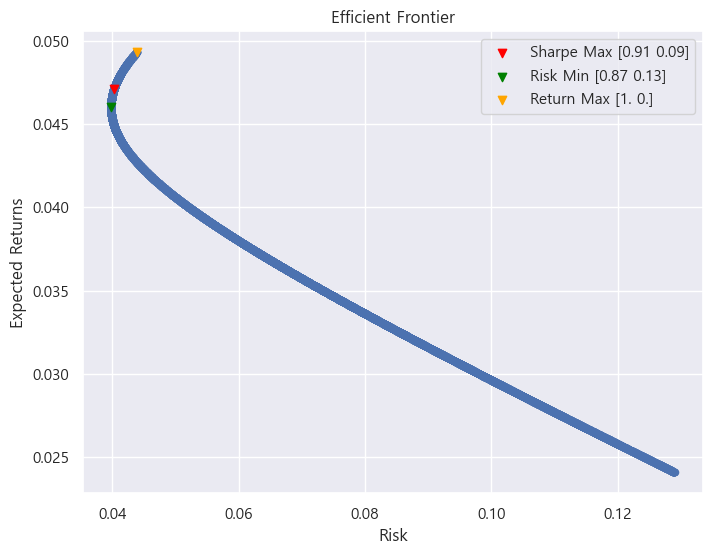

In [49]:
df.plot.scatter(x='Risk', y='Returns', figsize=(8, 6), grid=True)
plt.scatter(sharp_max_point['Risk'], sharp_max_point['Returns'], c='red', marker='v', label='Sharpe Max {}'.format(np.round(sharp_max_point[['stock','bond']].values[0], 2)))
plt.scatter(risk_min_point['Risk'], risk_min_point['Returns'], c='green', marker='v', label='Risk Min {}'.format(np.round(risk_min_point[['stock','bond']].values[0], 2)))
plt.scatter(return_max_point['Risk'], return_max_point['Returns'], c='orange', marker='v', label='Return Max {}'.format(np.round(return_max_point[['stock','bond']].values[0], 2)))

plt.title('Efficient Frontier') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.legend()
plt.show() 